In [1]:
from library import *

In [2]:
def create_gate(name, N=2):
    qc = QuantumCircuit(N, name=name)
    return qc.to_instruction()

In [3]:
from qiskit import *

i = QuantumRegister(1, '|i\\rangle')
j = QuantumRegister(1, '|j\\rangle')
k = QuantumRegister(1, '|k\\rangle')

In [4]:
def get_qubits(N):
    return [QuantumRegister(1, f'q{i} \\text{{in}} |0\\rangle') for i in range(N)]
print(get_qubits(2))

[QuantumRegister(1, 'q0 \text{in} |0\rangle'), QuantumRegister(1, 'q1 \text{in} |0\rangle')]


In [5]:
qc1 = QuantumCircuit(1, name="B")
B = qc1.to_instruction()

qc = QuantumCircuit(k,j,i, name="A")
A = qc.to_instruction()

qc2 = QuantumCircuit(2)

# for doubly rotosolve

In [6]:
#https://stackoverflow.com/questions/40642061/how-to-set-axis-ticks-in-multiples-of-pi-python-matplotlib

import numpy as np
import matplotlib.pyplot as plt

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int64(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

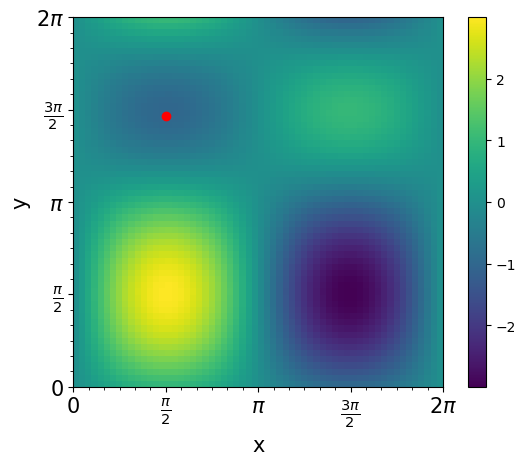

In [7]:
N = 60
estimated_trace = np.empty((N,N))
#cost_func = get_cost_function(estimate_r_circuits, [1,1], [1, 1])
x = np.linspace(0,2*np.pi, N)[None,:]
y = x[0,:,None]

color = np.sin(x) + 2 * np.sin(x)*np.sin(y)

local_minimimum_region = color + 3*(y<np.pi+.3) + 3*(x>np.pi+.3)
cm = plt.imshow(color, origin="lower", extent=(0,2*np.pi,0,2*np.pi))
plt.colorbar(cm)
argmin = np.argmin(local_minimimum_region)
plt.scatter(argmin%N/N*2*np.pi, argmin//N/N*2*np.pi, color="red")
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax.tick_params(labelsize=15)
plt.xlabel("x", fontdict={"size":15})
plt.ylabel("y", fontdict={"size":15})

plt.savefig("results/other_figures/rotosolve_local_minimum_problem.pdf", bbox_inches="tight")

# bell state

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


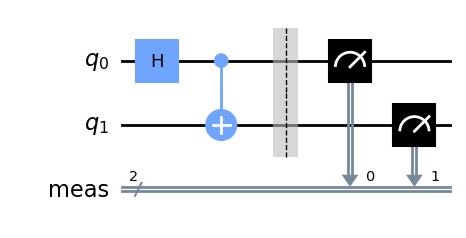

In [8]:
qc = QuantumCircuit(2)#*get_qubits(2))
qc.h(0)
qc.cnot(0,1)
qc.measure_all()
fig = qc.draw()
fig.savefig("results/other_figures/bell-state.pdf")
fig

# trace of operators

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


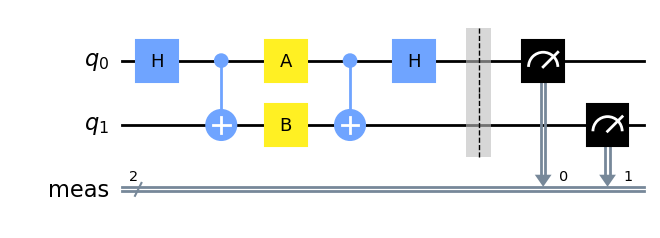

In [9]:
qc1.name = "A"
A_ = qc1.to_instruction()
qc = QuantumCircuit(2)
qc.h(0)
qc.cnot(0,1)

qc.append(A_,[0])
qc.append(B,[1])

qc.cnot(0,1)
qc.h(0)

qc.measure_all()
fig = qc.draw()
fig.savefig("results/other_figures/trace_of_operators.pdf")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


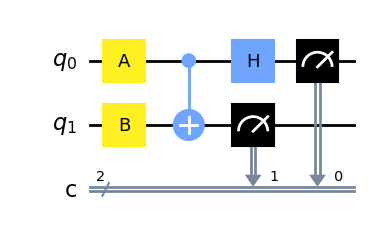

In [10]:
qc1.name = "A"
A_ = qc1.to_instruction()
qc = QuantumCircuit(2,2)


qc.append(A_,[0])
qc.append(B,[1])

qc.cnot(0,1)
qc.h(0)

qc.measure(range(2), range(2))
fig = qc.draw()
fig.savefig("results/other_figures/scalar_product_of_states.pdf")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


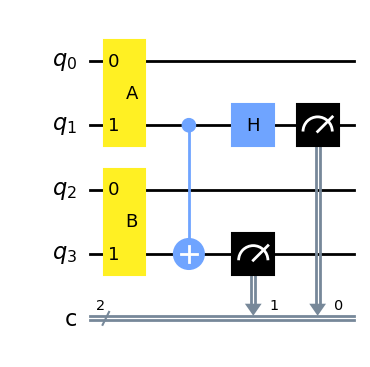

In [11]:
qc2.name="B"
B = qc2.to_instruction()
qc2.name = "A"
A = qc2.to_instruction()
qc = QuantumCircuit(4,2)


qc.append(A,[0,1])
qc.append(B,[2,3])

qc.cnot(1,3)
qc.h(1)

qc.measure([1,3],[0,1])
fig = qc.draw()
fig.savefig("results/other_figures/trace_of_density_matrices.pdf")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


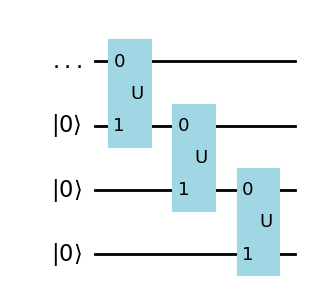

In [12]:

U = create_U_gate("U", 1,1, reps=0)

num_needed_init_qubits = 3
qubits = [QuantumRegister(1, ' '*i +'|0\\rangle') for i in range(num_needed_init_qubits)]
circ = QuantumCircuit(QuantumRegister(1, "..."), *qubits)

num_init_qubits = 0
while num_init_qubits < num_needed_init_qubits:
    offset =  num_init_qubits
    circ.append(U, range(offset, U.num_qubits + offset))
    num_init_qubits += 1
fig = circ.draw()
fig.savefig("results/other_figures/iMPS.pdf")
fig

In [13]:
U_param_values = []
mps = iMPS(create_gate("V", 2), create_U_gate("U", 1,1, reps=0), U_param_values)
braMPS = iMPS(create_gate("V'", 2), create_U_gate("U'", 1,1, reps=0), U_param_values)

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


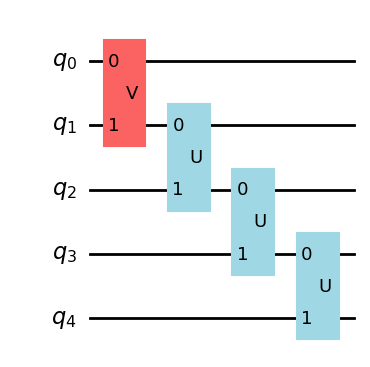

In [14]:
fig = mps.construct_mps_ket_circ(3).draw()
fig.savefig("results/other_figures/initialized_iMPS.pdf")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


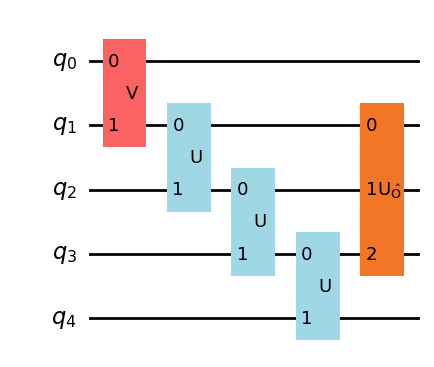

In [15]:
qc = mps.construct_mps_ket_circ(3)
U_O = create_gate("U_O", 3)
qc.append(U_O, [1,2,3])
fig = qc.draw()
fig.savefig("results/other_figures/estimate_expectation_value.pdf", bbox_inches = "tight")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


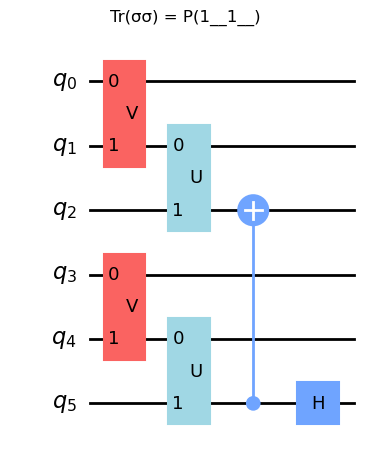

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


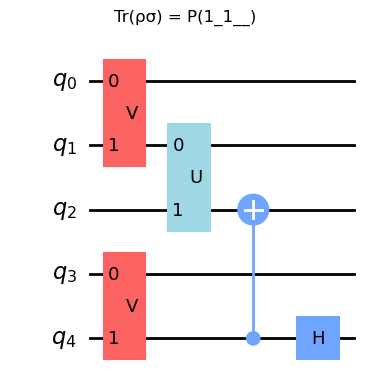

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


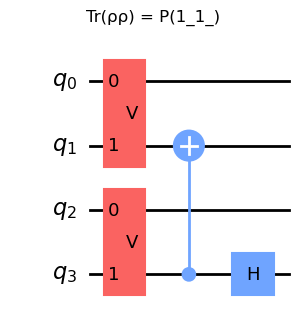

In [16]:
V = create_gate("V", 2)
names, circuits, _, _ = zip(*get_circuits_for_V_optimization(U, V))
obs_strings = ["1__1__", "1_1__", "1_1_"]
for name, circ, obs_string in zip(names, circuits, obs_strings):
    fig = circ.draw()
    fig.axes[0].set_title(f"Tr({name}) = P({obs_string})")
    display(fig)
    fig.savefig(f"results/other_figures/trace_of_{name}.pdf")

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


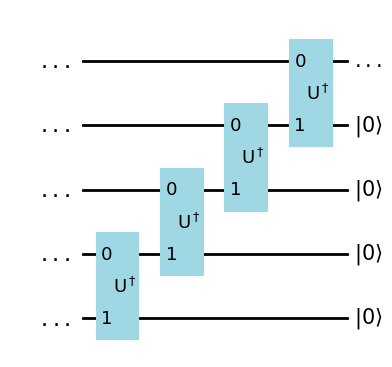

In [17]:

U = create_U_gate("U", 1,1, reps=0)

num_needed_init_qubits = 4
qubits = [QuantumRegister(1, ' '*i +' ...') for i in range(num_needed_init_qubits)]
circ = QuantumCircuit(QuantumRegister(1, "..."), *qubits)

num_init_qubits = 0
while num_init_qubits < num_needed_init_qubits:
    offset =  num_init_qubits
    circ.append(U, range(offset, U.num_qubits + offset))
    num_init_qubits += 1
circ_inv = circ.inverse()


fig = circ_inv.draw()

texts = ["$|0\\rangle$"]*4 + ["$...$"]
for i, text in enumerate(texts):
    fig.text(.9,.185 + .142*i, text, {"size": 15})
    
fig.savefig("results/other_figures/bra-iMPS.pdf", bbox_inches = "tight")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


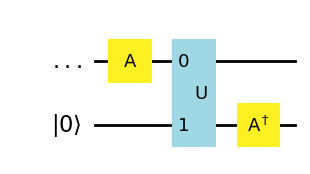

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


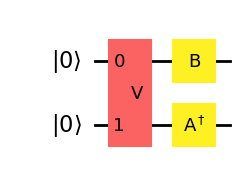

In [18]:
A = create_gate("A", 1)
B = create_gate("B", 1)
qubits = [QuantumRegister(1, '...'), QuantumRegister(1, '|0\\rangle')]
qc = QuantumCircuit(*qubits)
qc.append(A, [0])
qc.append(mps.U, [0,1])
qc.append(A.inverse(), [1])
fig = qc.draw()
fig.savefig("results/other_figures/alternative_U.pdf")
display(fig)

qubits = [QuantumRegister(1, ' '*i +'|0\\rangle') for i in range(2)]
qc = QuantumCircuit(*qubits)
qc.append(mps.V, [0,1])
qc.append(B, [0])
qc.append(A.inverse(), [1])
fig = qc.draw()
fig.savefig("results/other_figures/alternative_V.pdf")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


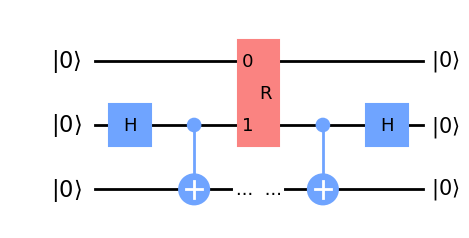

In [19]:
ldots = create_gate("...  ...", 1)
R = create_gate("R", 2)
qc = QuantumCircuit( *[QuantumRegister(1, ' '*i +'|0\\rangle') for i in range(3)])
qc.h(1)
qc.cnot(1,2)

qc.append(R, [0,1])
qc.append(ldots, [2])

qc.cnot(1,2)
qc.h(1)

fig = qc.draw()
fig.text(.9,.23,"$|0\\rangle$",{"size": 15})
fig.text(.9,.45,"$|0\\rangle$",{"size": 15})
fig.text(.9,.68,"$|0\\rangle$",{"size": 15})

fig.savefig("results/other_figures/right_mixed_env.pdf")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


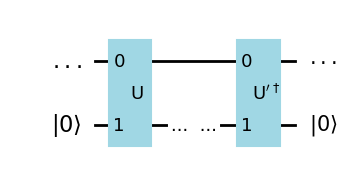

In [20]:
ldots = create_gate("...  ...", 1)
qc = QuantumCircuit(*[QuantumRegister(1, ' '*i + '...') for i in range(1)], *[QuantumRegister(1, ' '*i +'|0\\rangle') for i in range(1)])
qc.append(mps.U, [0,1])
qc.append(ldots, [1])
qc.append(braMPS.U.inverse(), [0,1])
fig = qc.draw()
fig.text(.92,.61,"$...$",{"size": 15})
fig.text(.92,.28,"$|0\\rangle$",{"size": 15})

fig.savefig("results/other_figures/transfer_matrix.pdf")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


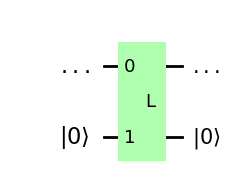

In [21]:
ldots = create_gate("...  ...", 1)
L = create_gate("L",2)
qc = QuantumCircuit(*[QuantumRegister(1, ' '*i + '...') for i in range(1)], *[QuantumRegister(1, ' '*i +'|0\\rangle') for i in range(1)])
qc.append(L, [0,1])
fig = qc.draw()
fig.text(.94,.61,"$...$",{"size": 15})
fig.text(.94,.26,"$|0\\rangle$",{"size": 15})
fig.tight_layout()
fig.savefig("results/other_figures/left_mixed_env.pdf", bbox_inches = "tight")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


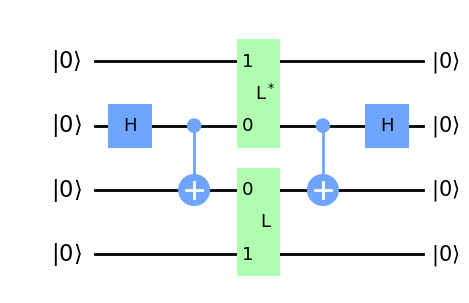

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


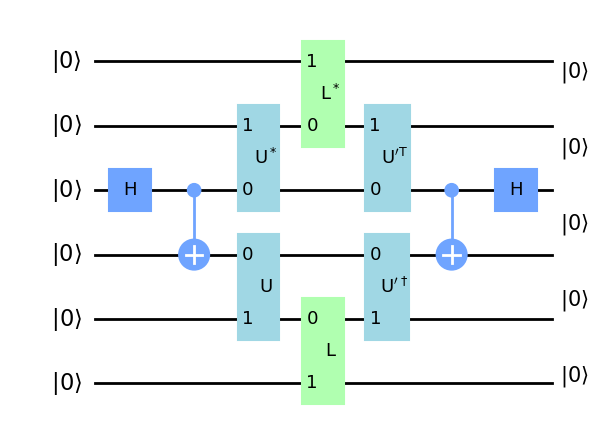

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


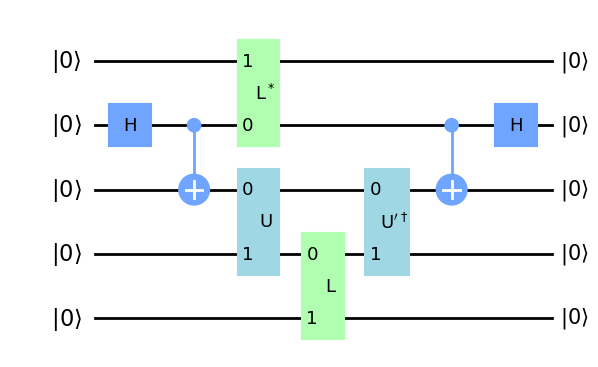

In [22]:
L_conj = create_gate("L^*", 2)

qc = QuantumCircuit(*[QuantumRegister(1, ' '*i +'|0\\rangle') for i in range(4)])
qc.h(1)
qc.cnot(1,2)
qc.append(L_conj, [1,0])
qc.append(L, [2,3])
qc.cnot(1,2)
qc.h(1)
fig = qc.draw()


texts = ["$|0\\rangle$"]*4
for i, text in enumerate(texts):
    fig.text(.9,.2 + .175*i, text, {"size": 15})

fig.savefig("results/other_figures/LL_dagger.pdf", bbox_inches = "tight")
display(fig)



qc = QuantumCircuit(*[QuantumRegister(1, ' '*i +'|0\\rangle') for i in range(6)])
qc.h(2)
qc.cnot(2,3)
qc.append(mps.U_conj, [2,1])
qc.append(mps.U, [3,4])
qc.append(L_conj, [1,0])
qc.append(L, [4,5])
qc.append(braMPS.U.inverse(), [3,4])
qc.append(braMPS.U_conj.inverse(), [2,1])
qc.cnot(2,3)
qc.h(2)
fig = qc.draw()


texts = ["$|0\\rangle$"]*5
for i, text in enumerate(texts):
    fig.text(.9,.185 + .142*i, text, {"size": 15})

fig.savefig("results/other_figures/LEE_dagger_L_dagger.pdf", bbox_inches = "tight")
display(fig)



qc = QuantumCircuit(*[QuantumRegister(1, ' '*i +'|0\\rangle') for i in range(5)])
qc.h(1)
qc.cnot(1,2)
qc.append(L_conj, [1,0])
qc.append(mps.U, [2,3])
qc.append(L, [3,4])
qc.append(braMPS.U.inverse(), [2,3])
qc.cnot(1,2)
qc.h(1)
fig = qc.draw()


texts = ["$|0\\rangle$"]*5
for i, text in enumerate(texts):
    fig.text(.9,.185 + .142*i, text, {"size": 15})

fig.savefig("results/other_figures/LEL_dagger.pdf", bbox_inches = "tight")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


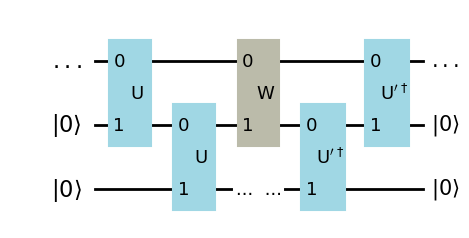

In [23]:
ldots = create_gate("...  ...", 1)
W = create_gate("W")
qc_ = wrap_with_transfer_matrix_n_times(ldots, mps, braMPS, W,1)
qc = QuantumCircuit(*[QuantumRegister(1, ' '*i + '...') for i in range(1)], *[QuantumRegister(1, ' '*i +'|0\\rangle') for i in range(2)])
qc.compose(qc_, range(3), inplace=True)
fig = qc.draw()

texts = ["$|0\\rangle$"]*2 + ["$...$"]
for i, text in enumerate(texts):
    fig.text(.9,.23 + .225*i, text, {"size": 15})

fig.savefig("results/other_figures/transfer_matrix_2.pdf", bbox_inches = "tight")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


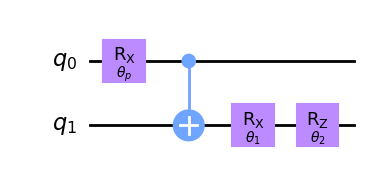

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


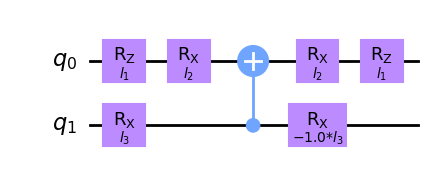

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


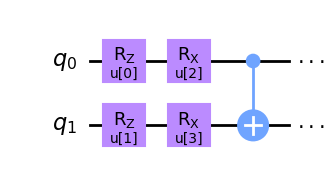

In [30]:
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.circuit.library import TwoLocal

theta_1 = Parameter("$θ_1$")
theta_2 = Parameter("$θ_2$")
theta_p = Parameter("$θ_p$")

create_any_density_matrix = QuantumCircuit(2, name="V")
create_any_density_matrix.rx(theta_p, 0)
create_any_density_matrix.cx(0, 1)
create_any_density_matrix.rx(theta_1, 1)
create_any_density_matrix.rz(theta_2, 1)

fig = create_any_density_matrix.draw()
fig.savefig("results/other_figures/V_circuit.pdf", bbox_inches = "tight")
display(fig)


params = Parameter("$l_1$"), Parameter("$l_2$"), Parameter("$l_3$")

qc = QuantumCircuit(2)

qc.rz(params[0], 0)
qc.rx(params[1], 0)

qc.rx(params[2], 1)
qc.cx(1,0)
qc.rx(-params[2], 1)

qc.rx(params[1], 0)
qc.rz(params[0], 0)

fig = qc.draw()
fig.savefig("results/other_figures/L_circuit.pdf", bbox_inches = "tight")
display(fig)

two = TwoLocal(2, ['rz', 'rx'], 'cx', 'linear',reps=1, parameter_prefix="u", skip_final_rotation_layer=True, flatten=True)
fig = two.draw()

texts = ["$...$"]*2
for i, text in enumerate(texts):
    fig.text(.9,.29 + .325*i, text, {"size": 15})

fig.savefig("results/other_figures/U_circuit.pdf", bbox_inches = "tight")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


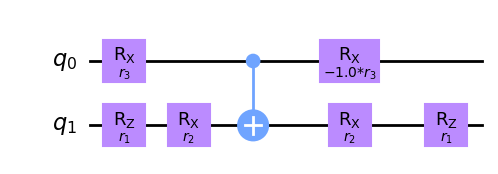

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


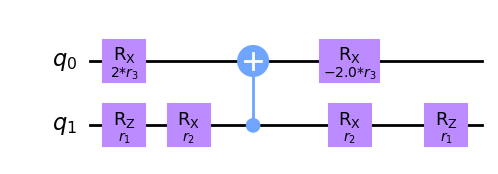

In [33]:
params = Parameter("$r_1$"), Parameter("$r_2$"), Parameter("$r_3$")

qc = QuantumCircuit(2)

qc.rz(params[0], 1)
qc.rx(params[1], 1)

qc.rx(params[2], 0)
qc.cx(0,1)
qc.rx(-params[2], 0)

qc.rx(params[1], 1)
qc.rz(params[0], 1)

fig = qc.draw()
fig.savefig("results/other_figures/R_circuit.pdf", bbox_inches = "tight")
display(fig)



qc = QuantumCircuit(2)

qc.rz(params[0], 1)
qc.rx(params[1], 1)

qc.rx(params[2]*2, 0)
qc.cx(1,0)
qc.rx(-params[2]*2, 0)

qc.rx(params[1], 1)
qc.rz(params[0], 1)

fig = qc.draw()
fig.savefig("results/other_figures/R_circuit_from_barratt-paper.pdf", bbox_inches = "tight")
display(fig)

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


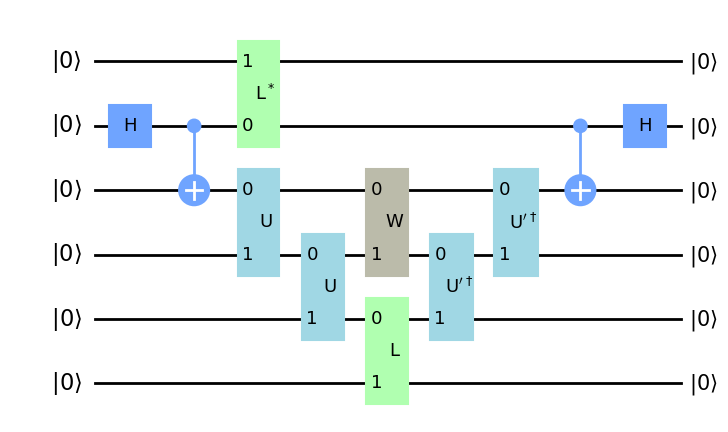

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


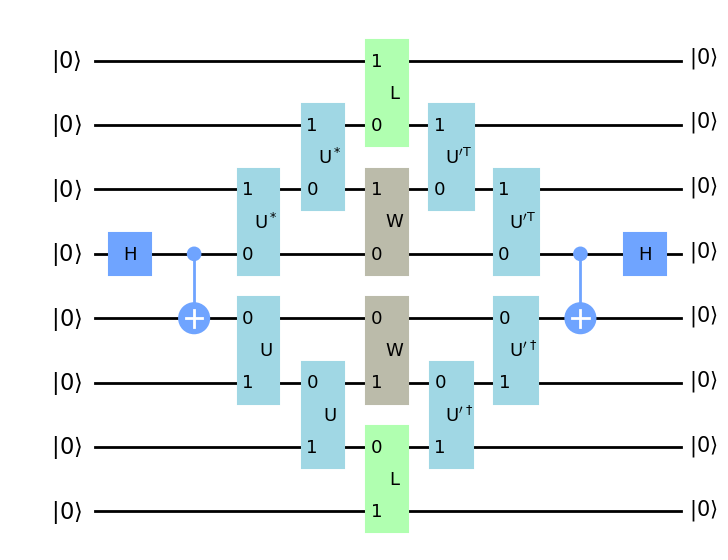

In [25]:
qc = QuantumCircuit(*[QuantumRegister(1, ' '*i +'|0\\rangle') for i in range(6)])
qc.h(1)
qc.cnot(1,2)

qc.append(L_conj, [1,0])
qc.compose(wrap_with_transfer_matrix_circ(L, mps, braMPS, W), range(2,6), inplace=True)

qc.cnot(1,2)
qc.h(1)

fig = qc.draw()


texts = ["$|0\\rangle$"]*6
for i, text in enumerate(texts):
    fig.text(.9,.17 + .12*i, text, {"size": 15})
fig.savefig("results/other_figures/LEL_with_W.pdf", bbox_inches = "tight")
display(fig)



qc = QuantumCircuit(*[QuantumRegister(1, ' '*i +'|0\\rangle') for i in range(8)])
qc.h(3)
qc.cnot(3,4)

qc.compose(wrap_with_transfer_matrix_circ(L, mps, braMPS, W, conjugated=True), range(3,-1,-1), inplace=True)
qc.compose(wrap_with_transfer_matrix_circ(L, mps, braMPS, W), range(4,8), inplace=True)

qc.cnot(3,4)
qc.h(3)

fig = qc.draw()


texts = ["$|0\\rangle$"]*8
for i, text in enumerate(texts):
    fig.text(.9,.16 + .092*i, text, {"size": 15})
fig.savefig("results/other_figures/LEEL_with_W.pdf", bbox_inches = "tight")
display(fig)

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


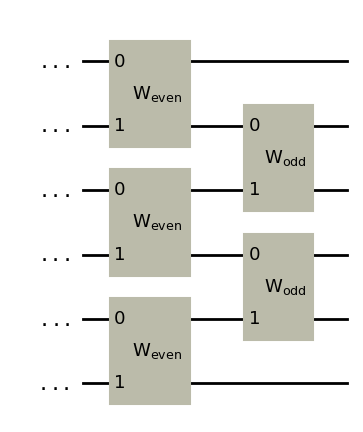

In [26]:
Wo = create_gate("W_odd")
We = create_gate("W_even")
qc = QuantumCircuit(*[QuantumRegister(1, " "*i+ "...") for i in range(6)])
qc.append(We, [0,1])
qc.append(We, [2,3])
qc.append(We, [4,5])
qc.append(Wo, [1,2])
qc.append(Wo, [3,4])
fig = qc.draw()
fig.savefig("results/other_figures/Troterization.pdf")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


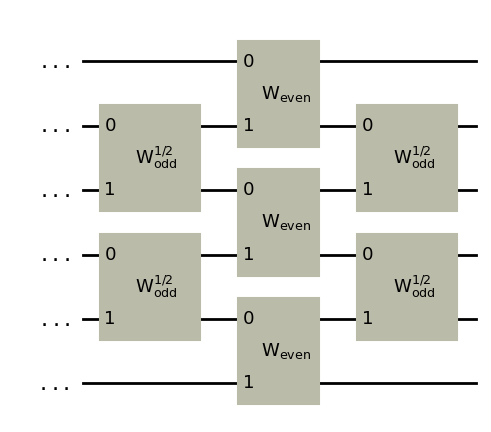

In [27]:
Wo = create_gate("W_odd2")
We = create_gate("W_even")
qc = QuantumCircuit(*[QuantumRegister(1, " "*i+ "...") for i in range(6)])
qc.append(Wo, [1,2])
qc.append(Wo, [3,4])
qc.append(We, [0,1])
qc.append(We, [2,3])
qc.append(We, [4,5])
qc.append(Wo, [1,2])
qc.append(Wo, [3,4])
fig = qc.draw()
fig.savefig("results/other_figures/Troterization2.pdf")
fig

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


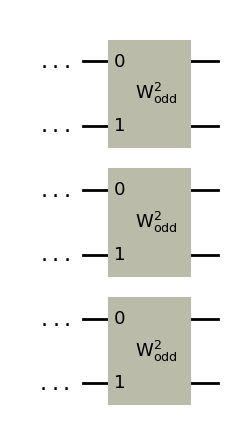

In [28]:
Wo = create_gate("W_odd^2")
qc = QuantumCircuit(*[QuantumRegister(1, " "*i+ "...") for i in range(6)])
qc.append(Wo, [0,1])
qc.append(Wo, [2,3])
qc.append(Wo, [4,5])
fig = qc.draw()
fig.savefig("results/other_figures/Troterization3.pdf")
fig